In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [6]:
titanic = pd.read_csv("train.csv")

In [7]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanic.shape

(891, 12)

In [13]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# HANDLING MISSING VALUES

In [17]:
titanic = titanic.drop(columns='Cabin',axis=1) #since most values on cabin column is null.

In [19]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True) #replacement with mean value

C:\Users\KIIT\AppData\Local\Temp\ipykernel_10416\2667439094.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(),inplace=True) #replacement with mean value


In [21]:
print(titanic['Embarked'].mode()) # replacement with most frequent value 

0    S
Name: Embarked, dtype: object


In [23]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace = True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_10416\1059360808.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace = True)


In [25]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [27]:
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

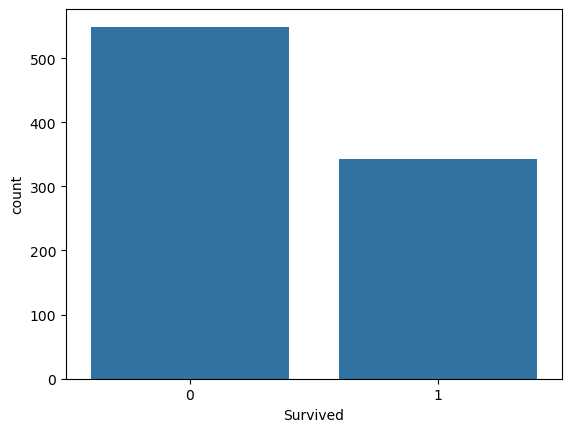

In [29]:
sns.countplot(x=titanic['Survived'])

<Axes: xlabel='Sex', ylabel='count'>

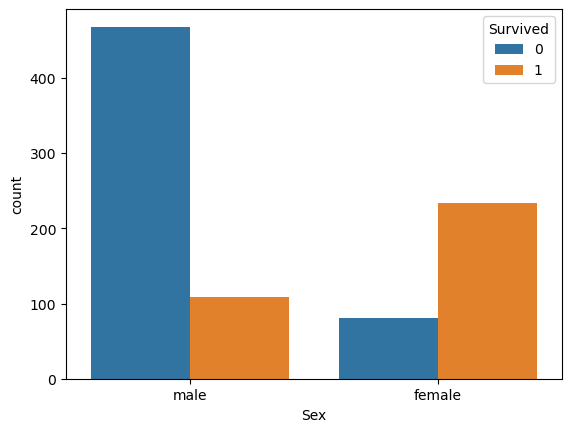

In [30]:
sns.countplot(x=titanic['Sex'],hue=titanic['Survived'])
# no. of survivors based on gender

<Axes: xlabel='Pclass', ylabel='count'>

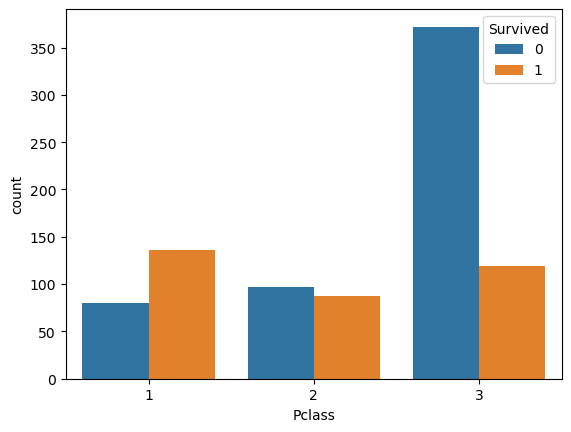

In [33]:
sns.countplot(x=titanic['Pclass'],hue=titanic['Survived'])
# no. of survivors based on pclass.

In [34]:
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [37]:
titanic['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [39]:
# CONVERTING CATEGORICAL COLUMNS

In [41]:
titanic.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_10416\2574723303.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)


In [43]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [45]:
# SEPERATING FEATURES AND TARGET

In [47]:
X = titanic.drop(columns = ['PassengerId','Survived','Name','Ticket'],axis=1)
y = titanic['Survived']

In [49]:
print(X)  

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [53]:
print(X.shape,X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


In [55]:
model = LogisticRegression()

In [57]:
# TRAINING THE MODEL WITH TRAINING DATA.

In [59]:
model.fit(X_train,y_train)

C:\Users\KIIT\anaconda-3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
# MODEL EVALUATION

In [63]:
# accuracy of training data
X_train_prediction = model.predict(X_train)

In [65]:
training_data_accuracy = accuracy_score(y_train,X_train_prediction)

In [76]:
print("Training Data Accuracy is:",training_data_accuracy*100,"%")

Training Data Accuracy is: 80.75842696629213 %


In [80]:
# accuracy of training data
X_test_prediction = model.predict(X_test)

In [82]:
test_data_accuracy = accuracy_score(y_test,X_test_prediction)

In [84]:
print("Test Data Accuracy is:",test_data_accuracy*100,"%")

Test Data Accuracy is: 78.2122905027933 %
